In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dearpygui.dearpygui as dpg

# 1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

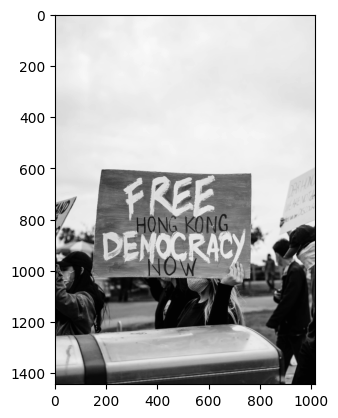

In [10]:
img = cv2.imread("hong.png", 0)
plt.imshow(img, cmap="gray")

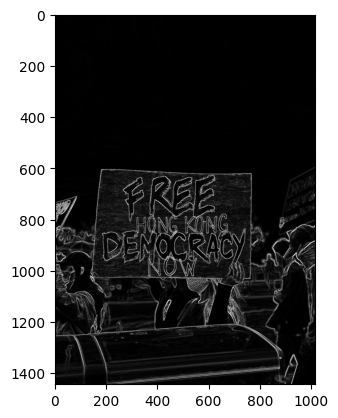

In [14]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad, cmap="gray")

# 2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dearpygui.dearpygui as dpg

In [7]:
image = cv2.imread("./starry_night.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, k = image.shape

def re_img(image):
    r_channel, g_channel, b_channel = cv2.split(image)
    r_channel = r_channel / 255
    g_channel = g_channel / 255
    b_channel = b_channel / 255
    alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype)
    return cv2.merge((r_channel, g_channel, b_channel, alpha_channel)).reshape(-1)
def blur(sender, app_data, user_data):
    kernel = np.ones((app_data,app_data),np.uint8)
    img_res = cv2.dilate(image,kernel,iterations = 2)
    dpg.set_value("texture_tag", re_img(img_res))
def sobel(sender, app_data, user_data):
    k_x = dpg.get_value('Sobel_x')
    k_y = dpg.get_value('Sobel_y')
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=k_x)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=k_y)
    abs_grad_x = cv2.convertScaleAbs(sobelx)
    abs_grad_y = cv2.convertScaleAbs(sobely)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    dpg.set_value("texture_tag", re_img(grad))
def flip(sender, app_data, user_data):
    M1 = dpg.get_value('M1')
    M2 = dpg.get_value('M2')
    M3 = dpg.get_value('M3')
    M4 = dpg.get_value('M4')
    M5 = dpg.get_value('M5')
    M6 = dpg.get_value('M6')
    M = np.float32([
        [M1, M2, M3],
        [M4, M5, M6]]
    )
    img_res = cv2.warpAffine(image, M, (int(width), int(height)))
    dpg.set_value("texture_tag", re_img(img_res))


In [10]:
dpg.create_context()

texture_data = re_img(image)
# width, height, channels, data = dpg.load_image("starry_night.jpg")
# texture_data = data
with dpg.texture_registry(show=False):
    dpg.add_dynamic_texture(width=width, height=height, default_value=texture_data, tag="texture_tag")

with dpg.window(tag="main"):
    with dpg.tab_bar(tag='tab_bar'):
        with dpg.tab(label="Blur"):
            with dpg.group(horizontal=True):
                dpg.add_text('kernel size')
                dpg.add_input_int(width= 100, callback=blur, default_value = 1, min_value = 1, min_clamped = True)
        with dpg.tab(label="Sobel operator"):
            with dpg.group(horizontal=True):
                dpg.add_text('kernel size_x')
                dpg.add_input_int(width= 100, default_value = 1, min_value = 1, min_clamped = True,tag='Sobel_x')
            with dpg.group(horizontal=True):
                dpg.add_text('kernel size_y')
                dpg.add_input_int(width= 100, default_value = 1, min_value = 1, min_clamped = True,tag='Sobel_y')
            dpg.add_button(label="aplay", callback=sobel)
        with dpg.tab(label="Transform"):
            dpg.add_text('M transform')
            with dpg.group(horizontal=True):
                dpg.add_input_float(width= 100, default_value=1, tag='M1')
                dpg.add_input_float(width= 100, tag='M2')
                dpg.add_input_float(width= 100, tag='M3')
            with dpg.group(horizontal=True):
                dpg.add_input_float(width= 100, tag='M4')
                dpg.add_input_float(width= 100, default_value=1, tag='M5')
                dpg.add_input_float(width= 100, tag='M6')
            dpg.add_button(label="aplay", callback=flip)
    dpg.add_image("texture_tag")

dpg.create_viewport(title='show_metods')
dpg.setup_dearpygui()
dpg.set_primary_window('main', True)
dpg.show_viewport()
dpg.start_dearpygui()
dpg.destroy_context()

# 3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

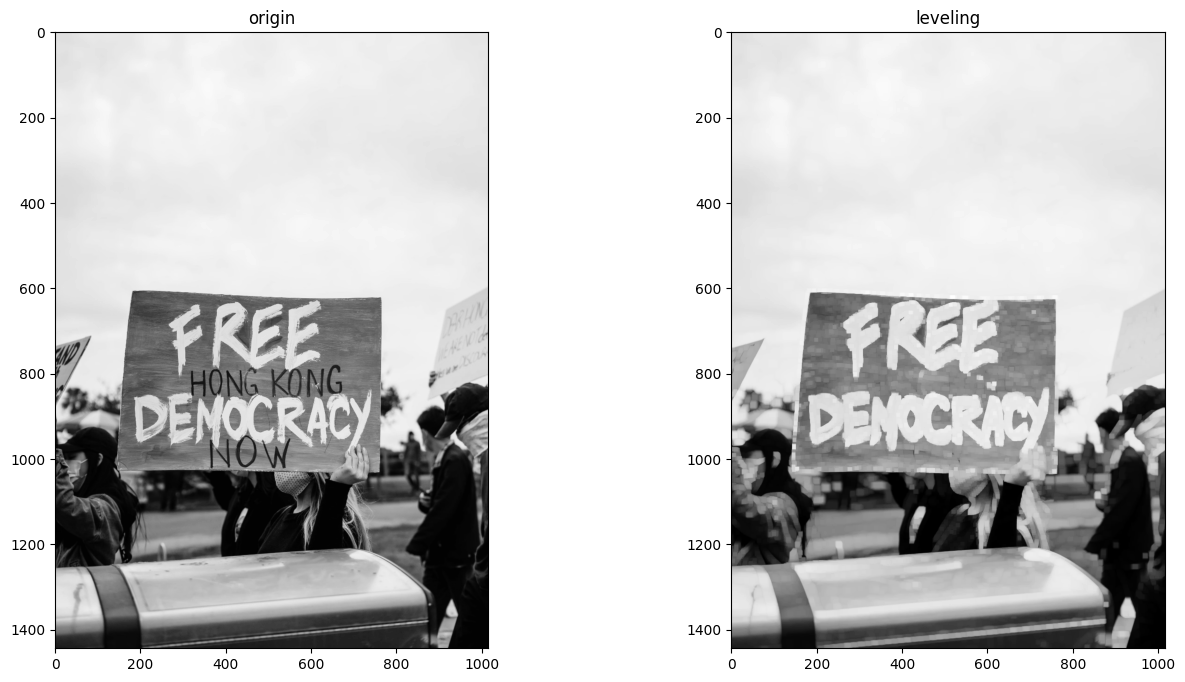

In [8]:
img = cv2.imread("hong.png", 0)
kernel = np.ones((5,5),np.uint8)
img_res = cv2.dilate(img,kernel,iterations = 2)
plt.figure(figsize=(16, 8)) 
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('origin')
plt.subplot(122), plt.imshow(img_res, cmap="gray"), plt.title('leveling')
plt.show()